### Student Information
Name: 謝其佑

Student ID: 110065539

GitHub ID: chillmelon

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

# part 1 Lab take home exercises

In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [3]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [4]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [5]:
# add category to the dataframe
X['category'] = twenty_train.target

In [6]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [7]:
#Answer here
#randomly pick 10 records from the first 100 records
X.loc[:100].sample(n=10)

,text,category,category_name
55,From: ken@cs.UAlberta.CA (Huisman Kenneth M) S...,1,comp.graphics
29,From: spp@zabriskie.berkeley.edu (Steve Pope) ...,2,sci.med
42,From: gwang@magnus.acs.ohio-state.edu (Ge Wang...,1,comp.graphics
21,From: gmiller@worldbank.org (Gene C. Miller) S...,0,alt.atheism
98,From: jmuller@ic.sunysb.edu (John S Muller) Su...,1,comp.graphics
44,From: rgasch@nl.oracle.com (Robert Gasch) Subj...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
33,From: jsledd@ssdc.sas.upenn.edu (James Sledd) ...,3,soc.religion.christian
92,From: bolson@carson.u.washington.edu (Edward B...,1,comp.graphics
88,From: wbdst+@pitt.edu (William B Dwinnell) Sub...,1,comp.graphics


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [8]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [9]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [10]:
# Answer here
# According to the document, it can only detect None, numpy.NaN which are NoneType and NA values.
# "NaN", "None" or empty strings are not NA values, they are strings instead.

In [11]:
X_sample = X.sample(n=1000) #random state

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [12]:
# Answer here
# the indices are randmoized

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

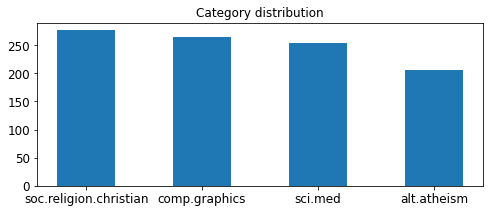

In [14]:
# Answer here

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           rot = 0, fontsize = 12, figsize = (8,3)).autoscale()

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

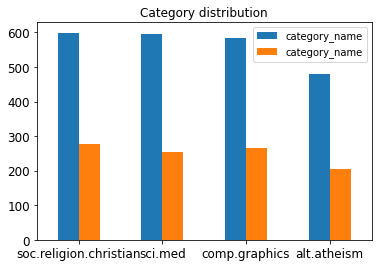

In [15]:
# Answer here

data1 = X.category_name.value_counts()
data2 = X_sample.category_name.value_counts()

df = pd.concat([data1, data2], axis=1)

df.plot(kind = 'bar',
    title = 'Category distribution',
    rot = 0, fontsize = 12)
plt.show()


In [16]:
import nltk

In [17]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [19]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [20]:
# Answer here
base = X_counts[0:5, 0:100].toarray()[4]
feature_names = count_vect.get_feature_names_out() 
for i in range(0, len(base)):
	if base[i] > 0:
		print(feature_names[i])

# I tried to print out the represented vocaburary of all 1 value
# So we can see the first 1 represents 00 and the second 1 represents 01


00
01


To get you started in thinking about how to better analyze your data or transformation, let us look at this nice little heat map of our term-document matrix. It may come as a surpise to see the gems you can mine when you start to look at the data from a different perspective. Visualization are good for this reason.

In [21]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [22]:
plot_x

['term_00',
 'term_000',
 'term_0000',
 'term_0000001200',
 'term_000005102000',
 'term_0001',
 'term_000100255pixel',
 'term_00014',
 'term_000406',
 'term_0007',
 'term_000usd',
 'term_0010',
 'term_001004',
 'term_0010580b',
 'term_001125',
 'term_001200201pixel',
 'term_0014',
 'term_001642',
 'term_00196',
 'term_002']

In [23]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [24]:
plot_z = X_counts[0:20, 0:20].toarray()

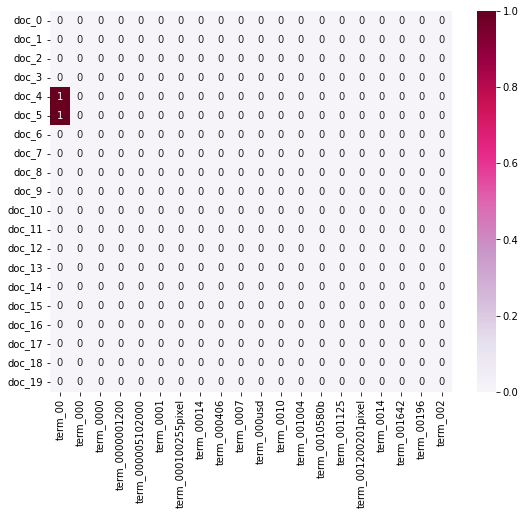

In [25]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

#### my answer
I tried to eliminate data that contain only zeros
So I can get a plot that shows only those rows with 1
This reduce a lot of time to plot
But the graph didn't show any meaningful message
So I thought I should stick with sparse matrix
And focus on showing the density distribution of data
Now we can see the whole picture

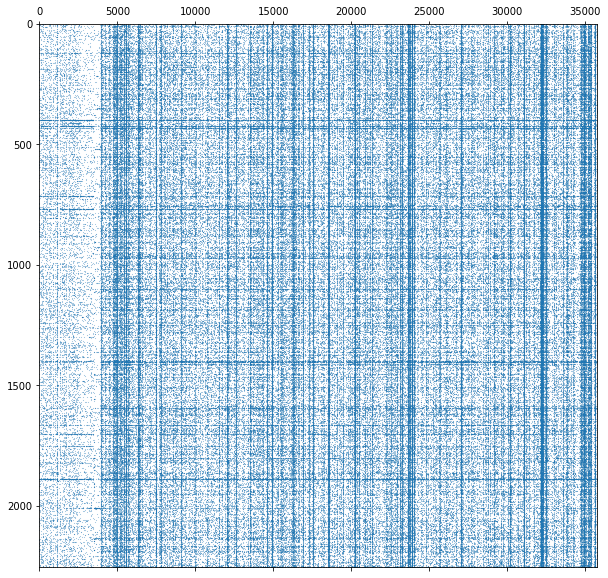

In [26]:
d = X_counts
plt.figure(figsize=(10, 10))
ax = plt.spy(d, aspect='auto', markersize=0.1)
plt.show()

And then I found out afterward that **CountVectorizer( )** actually came with an augment called **max_features** that can get the top n frequent words. So I'm going to try to plot the top 25 freqent words with heatmaps

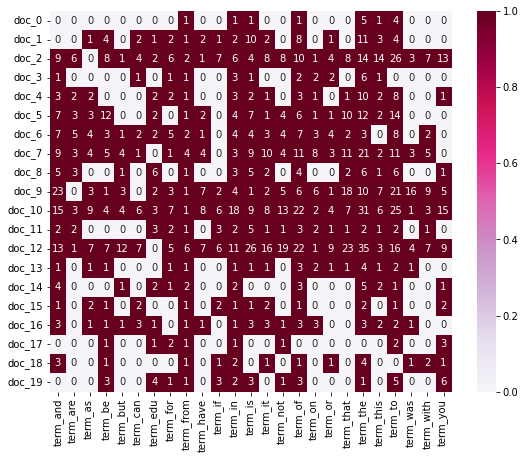

In [27]:
count_vect_top20 = CountVectorizer(max_features=25)
X_counts_top20 = count_vect_top20.fit_transform(X.text)
count_vect_top20.get_feature_names_out()
plot_x = ["term_"+str(i) for i in count_vect_top20.get_feature_names_out()[0:25]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts_top20[0:20, 0:25].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

[PCA Algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

**Input:** Raw term-vector matrix

**Output:** Projections 

In [28]:
from sklearn.decomposition import PCA

In [29]:
print(len(X_counts.toarray()))
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

2257


In [30]:
X_reduced.shape

(2257, 2)

In [31]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

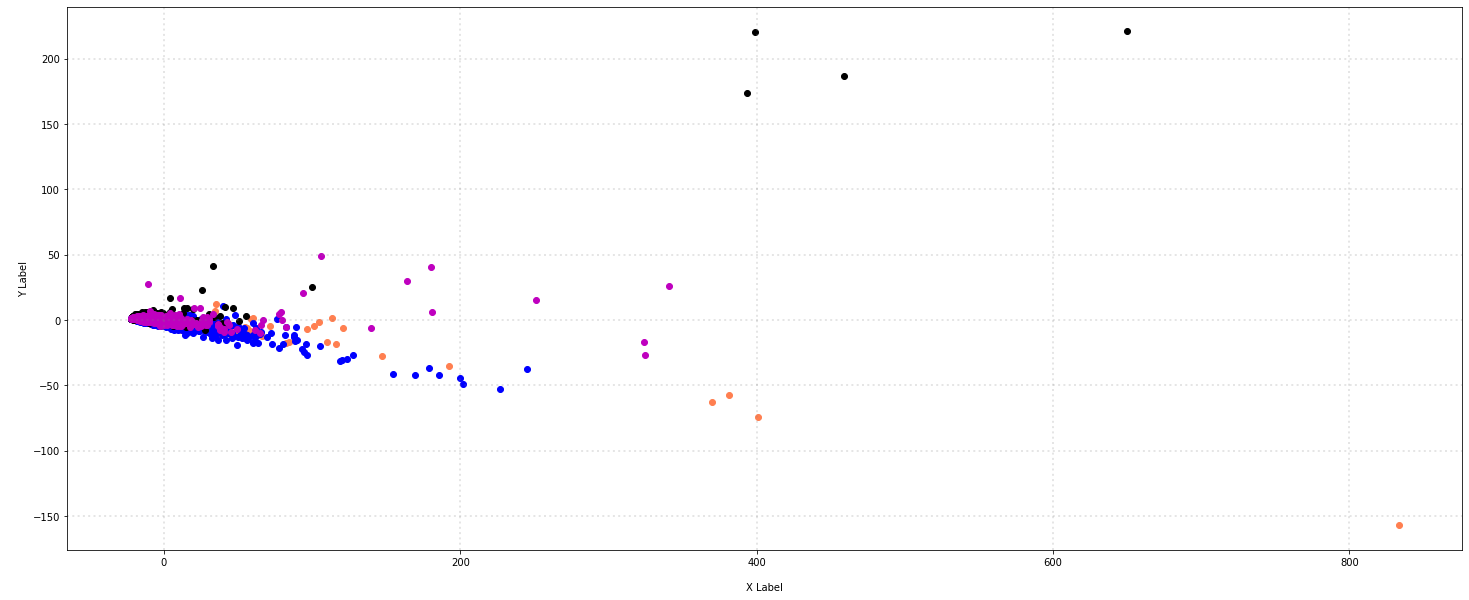

In [32]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [33]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [34]:
# Answer here
X_3d = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_3d.shape

(2257, 3)

First, I try to plot with a camera angle like the 2D one above.
We can see the black dots are more close to us instead of the purple ones.
This is something that 2D graph cannot show us.

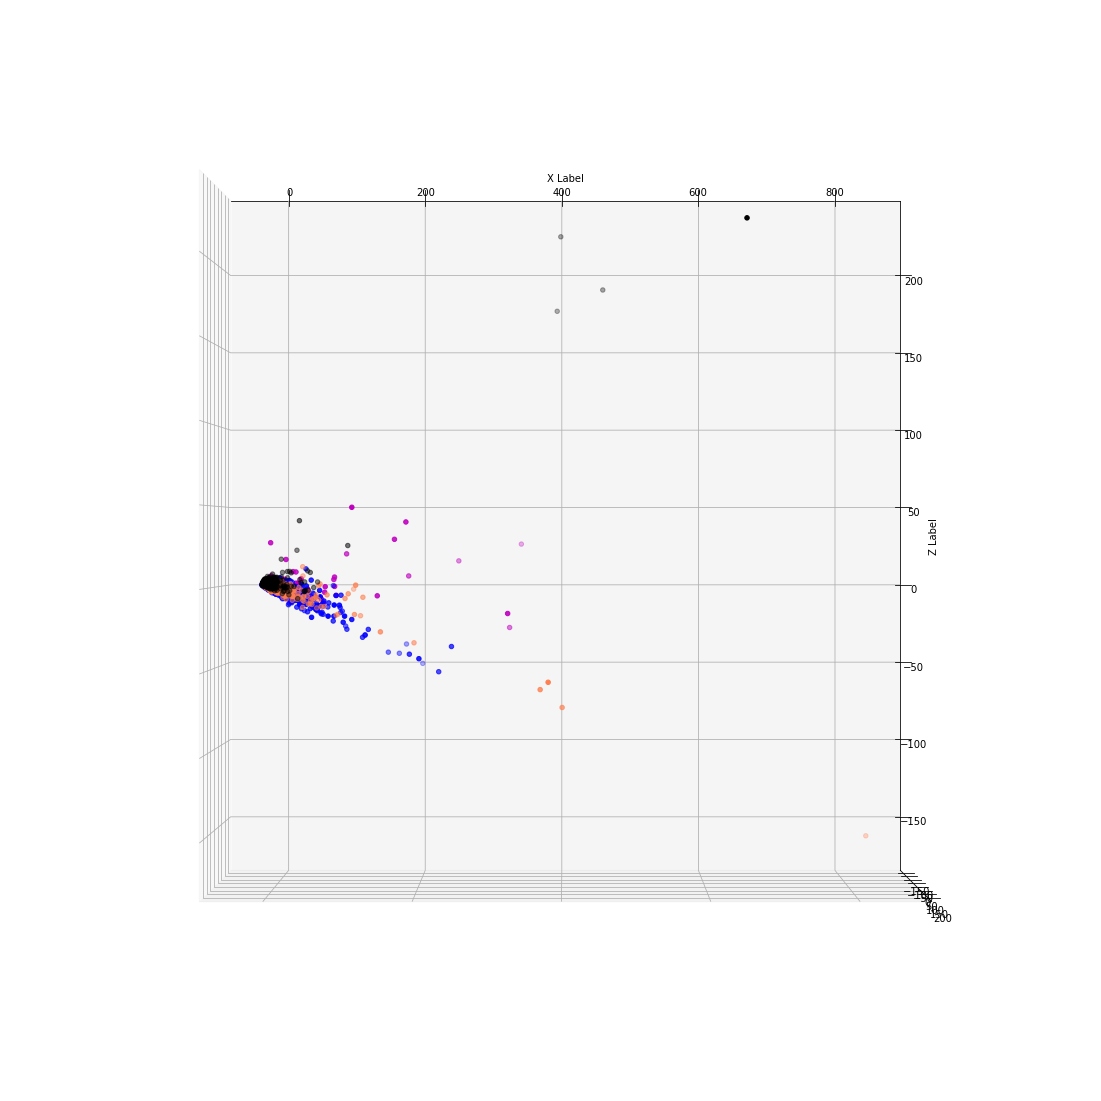

In [35]:
def plot_3d_arr(azim, elev, colors, data):
    fig = plt.figure(figsize = (20, 20))
    ax = fig.add_subplot(111, projection='3d', azim=azim, elev=elev)

    for c, category in zip(colors, categories):
        xs = data[X['category_name'] == category].T[0]
        ys = data[X['category_name'] == category].T[1]
        zs = data[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o')
        
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_ylabel('\nZ Label')

    plt.show()

plot_3d_arr(-90, 90, col, X_3d)

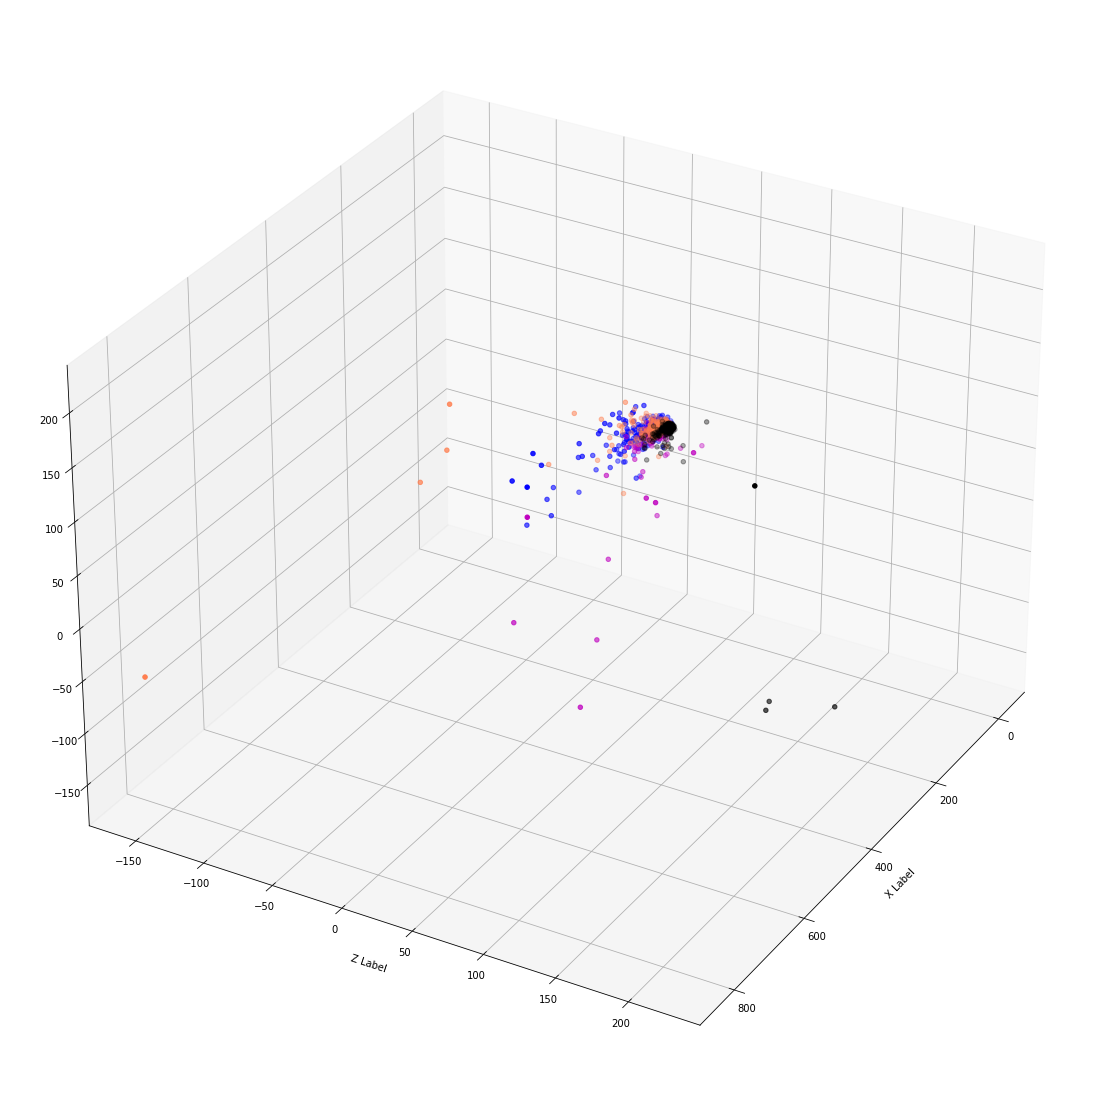

In [36]:
plot_3d_arr(30, 30, col, X_3d)

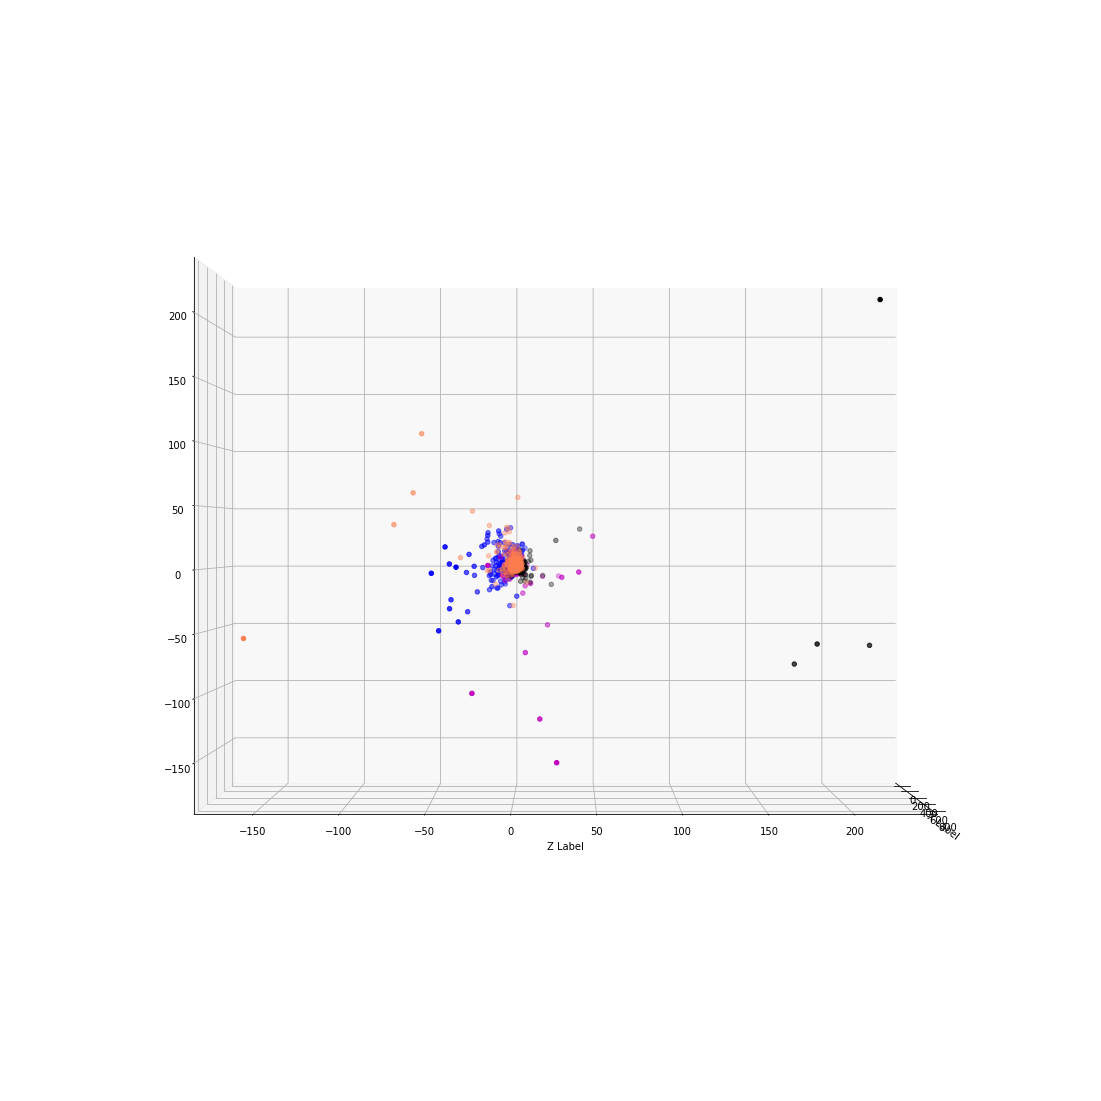

In [37]:
plot_3d_arr(0, 0, col, X_3d)

We can see from the 3rd graph, the dots are distributed in 4 area.
But I don't know why they are all jammed up in the middle.

### 5.5 Atrribute Transformation / Aggregation
We can do other things with the term-vector matrix besides applying dimensionalaity reduction technique to deal with sparsity problem. Here we are going to generate a simple distribution of the words found in all the entire set of articles. Intuitively, this may not make any sense, but in data science sometimes we take some things for granted, and we just have to explore the data first before making any premature conclusions. On the topic of attribute transformation, we will take the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words. Let us get into it!

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vTMfs0zWsbeAl-wrpvyCcZqeEUf7ggoGkDubrxX5XtwC5iysHFukD6c-dtyybuHnYigiRWRlRk2S7gp/pub?w=750&h=412)

In [38]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [39]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [40]:
term_frequencies[0]

134

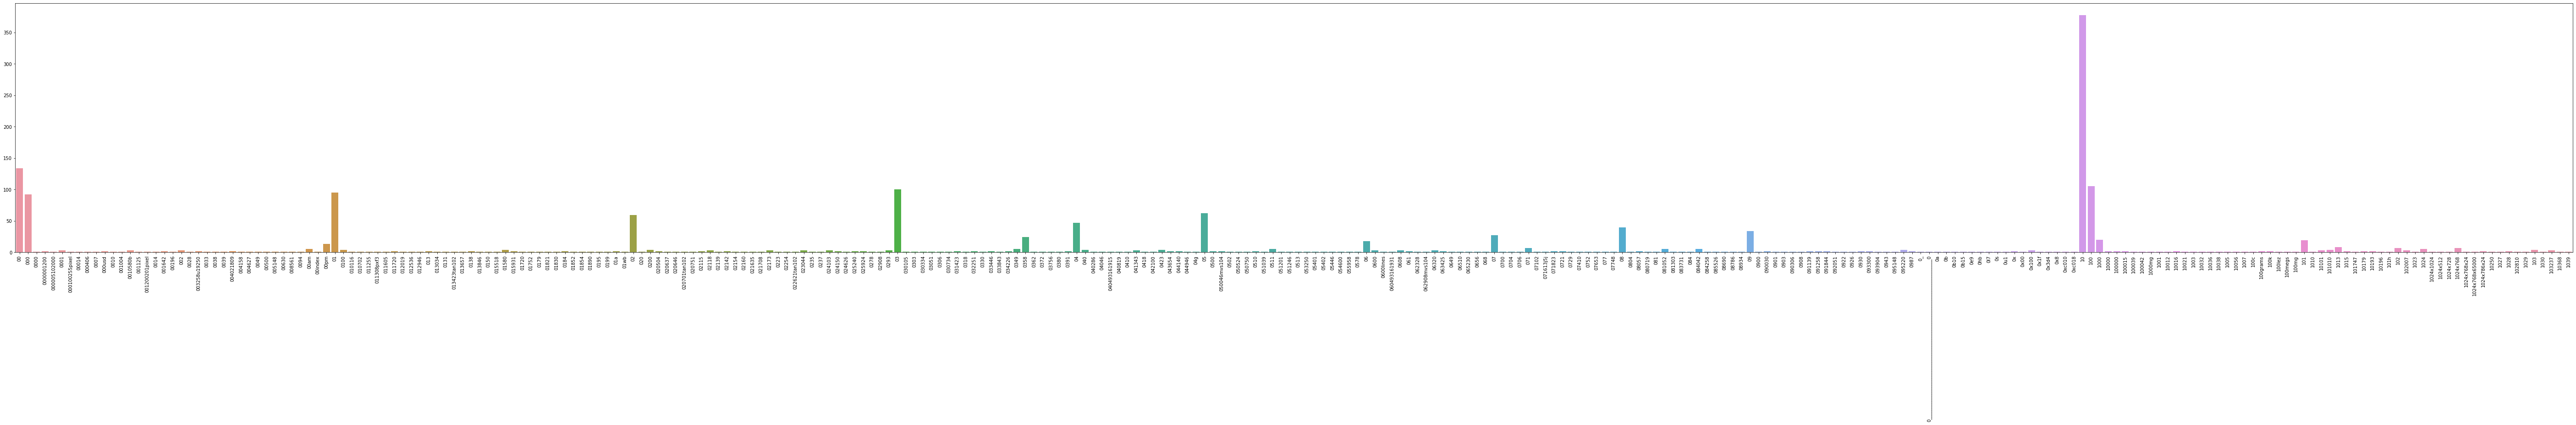

In [41]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [42]:
# Answer here
import plotly.express as px

my_graph = px.bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])
my_graph.update_layout(
	width=1200,
	height=500,
)

my_graph.show()


### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [43]:
# Answer here
# I filtered out those data who have 0 frequency
my_freq = term_frequencies[:300]
my_vocab = count_vect.get_feature_names_out()[np.nonzero(my_freq)]

my_graph = px.bar(x=my_vocab, y=my_freq)
my_graph.update_layout(
	width=1200,
	height=500,
)

my_graph.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [44]:
# Answer here
my_graph.update_layout(
    xaxis = {
        'categoryorder': 'total descending'
    }
)

my_graph.show()

In [45]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
mlb.classes_
X['bin_category'] = mlb.transform(X['category']).tolist()
X[0:9]

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [46]:
# Answer here
mlb.fit(X.category_name)
mlb.classes_
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

# Yes, it works

,text,category,category_name,unigrams,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]","[0, 0, 1, 0]"


# Part 2
## Data Preparation

In [47]:
columns = ["sentence", "score"]
df_amazon = pd.read_csv("data/amazon_cells_labelled.txt", sep="\t", names=columns)
df_imdb = pd.read_csv("data/imdb_labelled.txt", sep="\t", names=columns)
df_yelp = pd.read_csv("data/yelp_labelled.txt", sep="\t", names=columns)
# query the first 10 records and see how it looks like
df_amazon.head()

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


## Data Transformation
### Adding Columns

In [48]:
df_amazon["source"] = "amazon"
df_imdb["source"] = "imdb"
df_yelp["source"] = "yelp"

### combine them into a large dataframe

In [49]:
dfs = [df_amazon, df_imdb, df_yelp]
large_df = pd.concat(dfs, ignore_index=True)
large_df.shape

(2748, 3)

## Data Mining using Pandas
### Missing Values

In [50]:
large_df.isnull().apply(lambda x: dmh.check_missing_values(large_df))

,sentence,score,source
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### Duplicate Data

In [51]:
print(len(large_df))
large_df.drop_duplicates(keep=False, inplace=True)
print(len(large_df))

2748
2714


## Data Preprocessing
### sampling

In [52]:
sample_df = large_df.sample(n=1000)
sample_df

,sentence,score,source
755,Then a few days later the a puff of smoke came...,0,amazon
825,The shipping time was also very quick!,1,amazon
278,"Best of all is the rotating feature, very help...",1,amazon
705,I love this cable - it allows me to connect an...,1,amazon
2184,definitely will come back here again.,1,yelp
...,...,...,...
1798,We ordered the duck rare and it was pink and t...,1,yelp
2738,The refried beans that came with my meal were ...,0,yelp
511,You never know if you pushed it hard enough or...,0,amazon
872,I was very pleased to see that I could replace...,1,amazon


### visualization

In [53]:
print(large_df.source.value_counts())

yelp      992
amazon    980
imdb      742
Name: source, dtype: int64


<AxesSubplot:title={'center':'Source distribution'}>

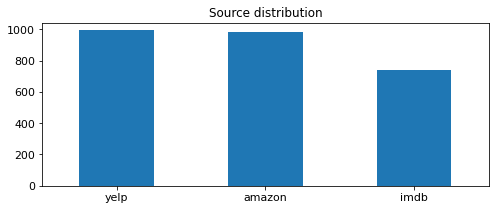

In [54]:
large_df.source.value_counts().plot(kind = 'bar',
                                    title = 'Source distribution',                            
                                    rot = 0, fontsize = 11, figsize = (8,3))

<AxesSubplot:title={'center':'Source distribution'}>

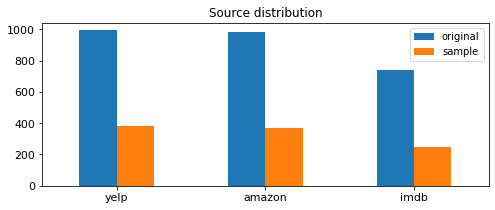

In [55]:
original_counts = large_df.source.value_counts()
sample_counts = sample_df.source.value_counts()
original_counts.name = "original"
sample_counts.name = "sample"
compared_df = pd.concat([original_counts, sample_counts], axis=1)

compared_df.plot(kind = 'bar',
                                    title = 'Source distribution',                            
                                    rot = 0, fontsize = 11, figsize = (8,3))

### Feature Creation

In [56]:
large_df['unigrams'] = large_df['sentence'].apply(lambda x: dmh.tokenize_text(x))
large_df

,sentence,score,source,unigrams
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,amazon,"[The, mic, is, great, .]"
...,...,...,...,...
2743,I think food should have flavor and texture an...,0,yelp,"[I, think, food, should, have, flavor, and, te..."
2744,Appetite instantly gone.,0,yelp,"[Appetite, instantly, gone, .]"
2745,Overall I was not impressed and would not go b...,0,yelp,"[Overall, I, was, not, impressed, and, would, ..."
2746,"The whole experience was underwhelming, and I ...",0,yelp,"[The, whole, experience, was, underwhelming, ,..."


### Feature subset selection

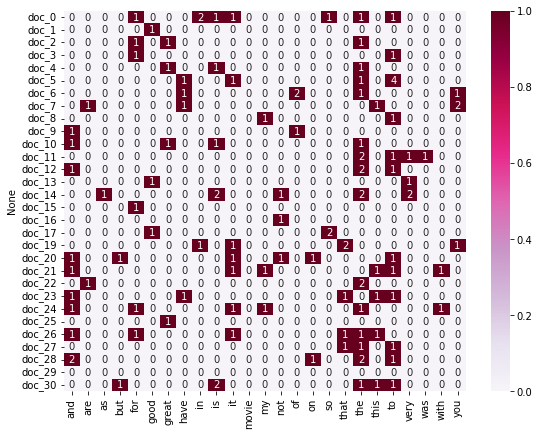

In [57]:
# this function can get the term-document matrix dataframe
def tdm(data, tokens):
    vec = CountVectorizer(max_features=tokens)
    X = vec.fit_transform(data)
    index=[data.index.map(lambda i: "doc_"+str(i))]
    df = pd.DataFrame(
        X.toarray(),
        columns=vec.get_feature_names_out()[0:tokens],
        index=index
    )
    
    return df

df_todraw = tdm(large_df.sentence, 25)[:30]
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Dimensionality Reduction using PCA

Start with **2D** and see if the data will be clustered by their **score**

In [58]:
# This function return a PCA Dataframe 
# with specified component number and data
def find_principal_components(n, data):
    pca = PCA(n_components = n)
    principalComponents = pca.fit_transform(data)
    return pd.DataFrame(pca.components_, columns=data.columns)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



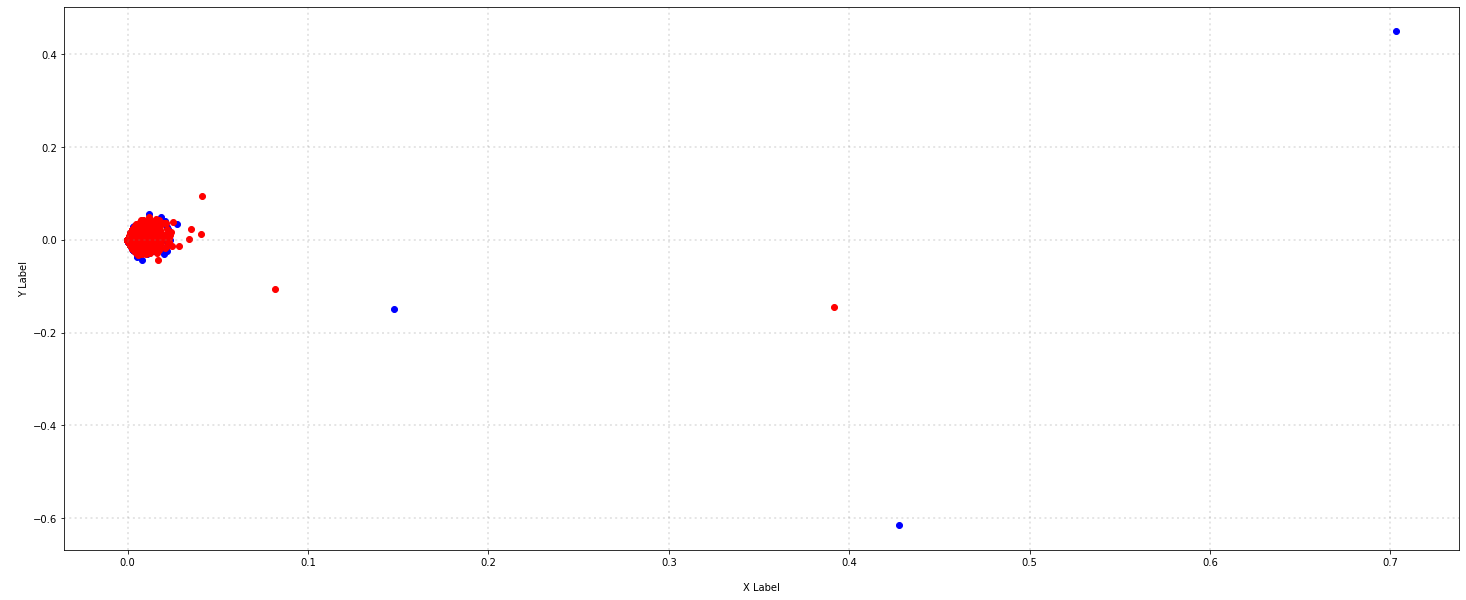

In [59]:
df = tdm(large_df.sentence, None)
df_pc = find_principal_components(2, df.T).T
colors = ["blue", "red"]
scores = [0, 1]
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, s in zip(colors, scores):
    # og_index stands for the original index in large_df
    og_index = large_df.loc[lambda f: f.score == s].index
    query_index = og_index.map(lambda x: "doc_"+str(x))
    xs = df_pc.loc[query_index][0].values
    ys = df_pc.loc[query_index][1].values
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

The data are not clustered by scores as expected
PCA method might not be suitable for scores
Then, I'll try 3D and see if they're clustered by sources

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



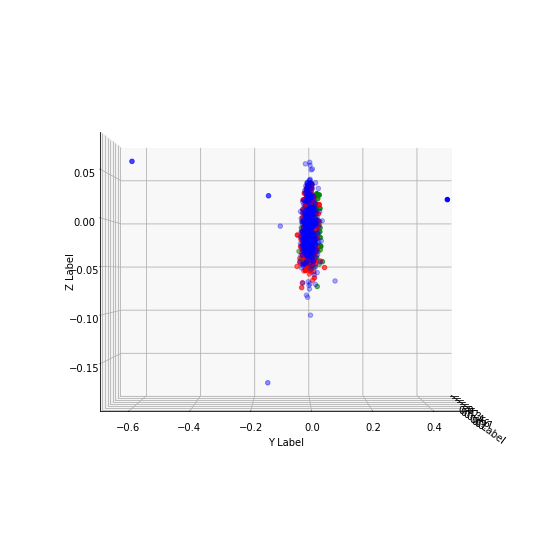

In [60]:
df_pc = find_principal_components(3, df.T).T

sources = ["amazon", "imdb", "yelp"]
colors = ["red", "blue", "green"]

def plot_3d(azim, elev):
    fig = plt.figure(figsize = (25,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    ax.view_init(azim, elev)
    
    for c, s in zip(colors, sources):
        # og_index stands for the original index in large_df
        og_index = large_df.loc[lambda f: f.source == s].index
        query_index = og_index.map(lambda x: "doc_"+str(x))
        xs = df_pc.loc[query_index][0].values
        ys = df_pc.loc[query_index][1].values
        zs = df_pc.loc[query_index][2].values
        ax.scatter(xs, ys, zs, c = c, marker='o')
        
    plt.show()
    
plot_3d(0, 0)

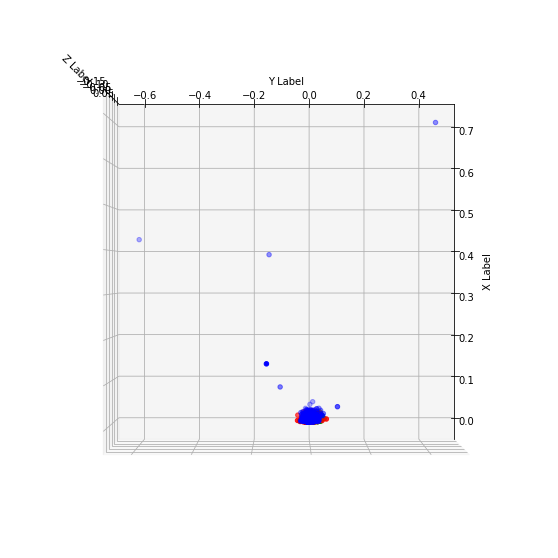

In [61]:
plot_3d(-90, 0)

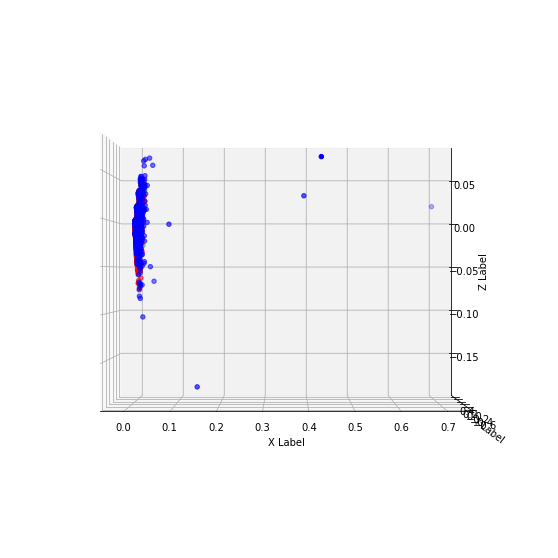

In [62]:
plot_3d(0, -90)

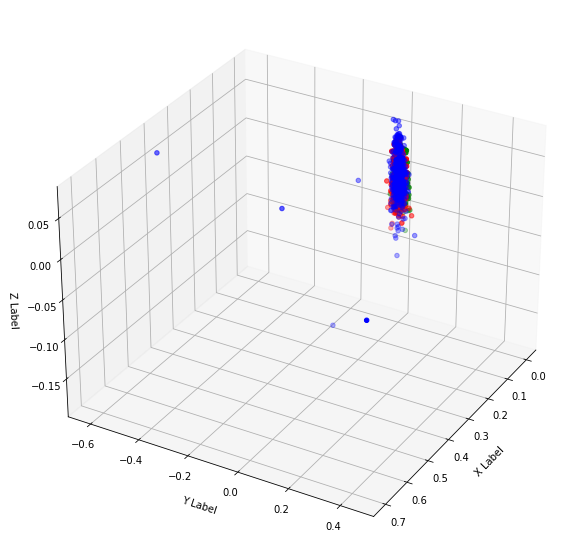

In [63]:
plot_3d(30, 30)

We can see the dots are all jammed up together.
I think PCA might not be suitable for this case

### Atrribute Transformation / Aggregation

In [64]:
df_counts = tdm(large_df.sentence, None)
term_frequencies = []
for j in range(0,df_counts.shape[1]):
	term_frequencies.append(sum(df_counts.iloc[:, j].values))


In [65]:
term_frequencies[0]

1

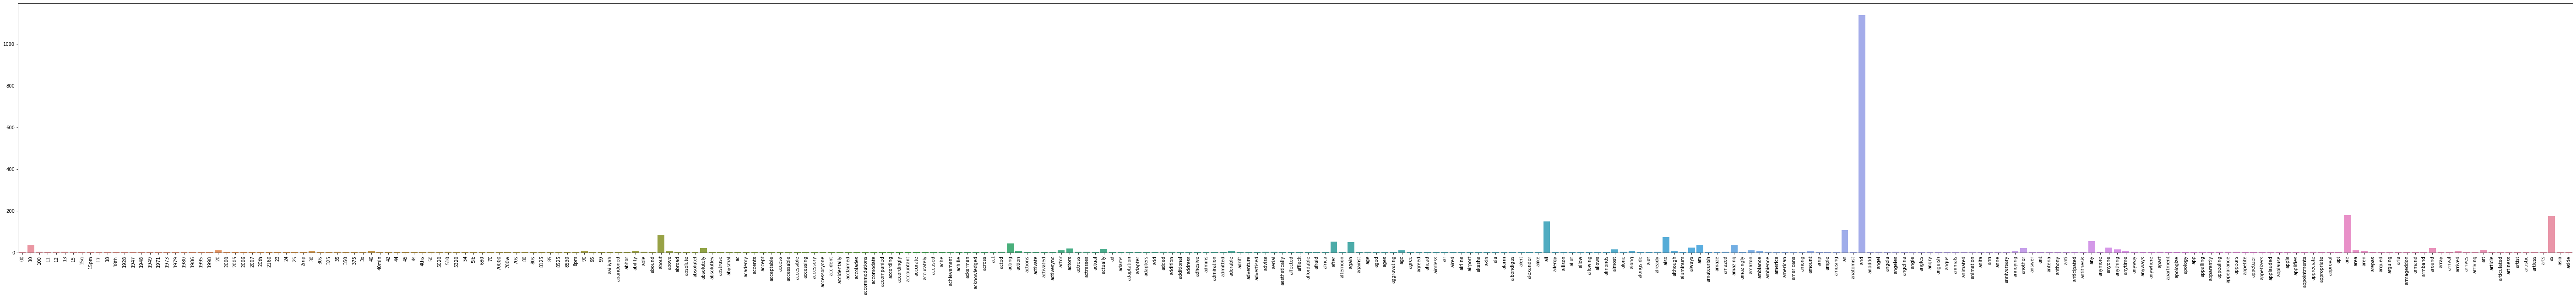

In [66]:
plt.subplots(figsize=(100, 10))
feature_names = df_counts.columns
graph = sns.barplot(x=feature_names[:300], y=term_frequencies[:300])
graph.set_xticklabels(feature_names[:300], rotation=90);


### visualize with plotly

In [67]:
graph = px.bar(x=feature_names[:300], y=term_frequencies[:300])
graph.update_layout(
	width=1200,
	height=500,
)

graph.show()


In [68]:
my_freq = np.array(term_frequencies[:300])
my_vocab = feature_names[np.where(my_freq > 10)]

graph = px.bar(x=my_vocab, y=my_freq[np.where(my_freq > 10)])
graph.update_layout(
	width=1200,
	height=500,
)

graph.show()

### long tail

In [69]:
graph.update_layout(
    xaxis={
        'categoryorder': 'total descending'
    }
)

graph.show()

I think that plotting with the whole data instead of the first 300 will look better

In [70]:
my_freq = np.array(term_frequencies)
my_vocab = feature_names[np.where(my_freq > 10)]
graph = px.bar(x=my_vocab, y=my_freq[np.where(my_freq > 10)])

graph.update_layout(
	width=1200,
	height=500,
    xaxis={
        'categoryorder': 'total descending'
    }
)

graph.show()

In [71]:
large_df
mlb = preprocessing.LabelBinarizer()
mlb.fit(large_df.source)
mlb.classes_
large_df['bin_source'] = mlb.transform(large_df['source']).tolist()
large_df[0:9]

,sentence,score,source,unigrams,bin_source
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,The mic is great.,1,amazon,"[The, mic, is, great, .]","[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0,amazon,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]"
6,If you have several dozen or several hundred c...,0,amazon,"[If, you, have, several, dozen, or, several, h...","[1, 0, 0]"
7,If you are Razr owner...you must have this!,1,amazon,"[If, you, are, Razr, owner, ..., you, must, ha...","[1, 0, 0]"
8,"Needless to say, I wasted my money.",0,amazon,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0, 0]"


# 3rd Part
## a. Utilize new way to visualize
Show frequency of words with pie chart

In [72]:
df_freq = df_counts.sum(axis=0).to_frame(name="counts")
df_freq = df_freq.rename_axis("feature").reset_index()
df_todraw = df_freq.loc[df_freq["counts"]>200]

fig = px.pie(df_todraw, values="counts", names="feature")
fig.show();

## b. TFIDF

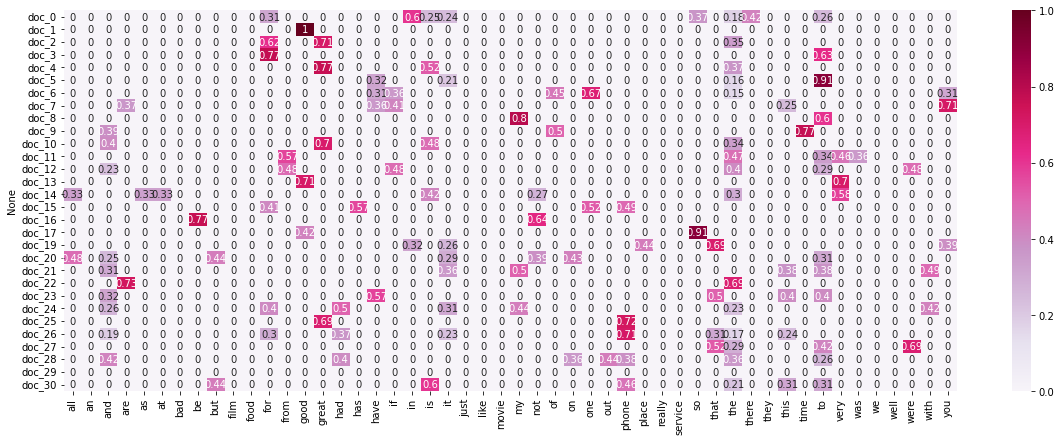

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_tdm(data, tokens):
    vec = TfidfVectorizer(max_features=tokens)
    X = vec.fit_transform(data)
    index = [data.index.map(lambda i: "doc_"+str(i))]
    df = pd.DataFrame(
        X.toarray(),
        columns=vec.get_feature_names_out()[0:tokens],
        index=index
    )

    return df


df_todraw = tfidf_tdm(large_df.sentence, 50)[:30]
plt.subplots(figsize=(20, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)



## c. Naive Bayes classifier